In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.font_manager as fm
# Importacion de mapas bases
import contextily as cx
from shapely.geometry.point import Point

<AxesSubplot:>

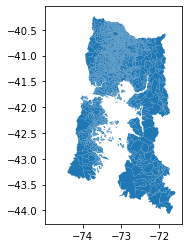

In [2]:
# CAMBIAR PARA CADA EXPERIMENTO!!!
N_EXP = 4

# Carga el archivo shapefile
shp_file = f"../resultados/resultados_{N_EXP}/risk_{N_EXP}.geojson"
gdf = gpd.read_file(shp_file)
gdf.plot()

In [3]:
# Obtener el nombre de las columnas, menos la columna "id" y "geometry"
columnas = list(gdf.columns)
columnas.remove("id")
columnas.remove("geometry")
#columnas.remove("vulnerability")
#columnas.remove("risk")
#columnas.remove("edad_65_mas_norm")
#columnas.remove("personas_norm")
#columnas.remove("sii_norm")
#columnas.remove("plantas_norm")
print(columnas)


# Definir la paleta de colores para los mapas
colormap = "RdYlGn_r"

['vulnerabilidad', 'exposicion amenaza', 'proporcion de respuesta', 'probabilidad de amenaza', 'exposicion amenaza normalizada', 'Riesgo normalizado', 'riesgo', 'poblacion ponderada', 'poblacion dependiente ponderada', 'cantidad empresas SII ponderada', 'cantidad plantas ponderadas', 'proporcion de respuesta ponderada', 'distancia amenaza ponderada', 'cantidad de CCAA ponderados ', 'probabilidad de amenaza ponderada', 'riesgo escalado robustamente']


In [4]:
# para la barra escala
points = gpd.GeoSeries([Point(-73.944, -40.986), Point(-73.243, -40.906)], crs=4326)  # Geographic WGS 84 - degrees
points = points.to_crs(32618) # Projected WGS 84 - meters
distance_meters = points[0].distance(points[1])

In [5]:
%%time
# Generar un mapa por cada columna
for columna in columnas:
    # para que sea graduado y no categorizado
    if (columna =='Riesgo normalizado' or columna =='vulnerabilidad' or columna == 'exposicion amenaza' or 
        columna =='proporcion de respuesta' or columna =='probabilidad de amenaza' or columna == 'riesgo escalado robustamente'): 
        # Crear una figura y un eje
        fig, ax = plt.subplots(figsize=(8, 9))

        # Agregar el mapa a la figura
        gdf.plot(column=columna, cmap=colormap, legend=True, scheme="quantiles", ax=ax) # delete categorical and scheme="quantiles"
        ax.add_artist(ScaleBar(dx=distance_meters, location="lower center", scale_loc='left', label_loc='left'))

        # Agregar flecha de norte y escala
        ax.arrow(0.9, 0.9, 0, 0.05, transform=ax.transAxes, width=0.01, head_width=0.04, head_length=0.02, fc="k", ec="k")
        ax.text(0.93, 0.95, "N", transform=ax.transAxes, fontsize=12)

        # Agregar título y leyenda
        ax.set_title("Mapa de " + columna, fontsize=16)
        ax.get_legend()

        # Agregar mapa base
        cx.add_basemap(ax, source=cx.providers.OpenStreetMap.DE, crs=gdf.crs)

        # Mejorar resolución de salida
        plt.rcParams['savefig.dpi']=600

        # Guardar el mapa como una imagen
        plt.savefig(f"../resultados/resultados_{N_EXP}/mapas/mapa_de_" + columna + ".png", format = "png")

        # Cerrar la figura para evitar problemas de memoria
        plt.close()
    else:
        # Crear una figura y un eje
        fig, ax = plt.subplots(figsize=(8, 9))

        # Agregar el mapa a la figura
        gdf.plot(column=columna, cmap=colormap, legend=True, categorical=True, ax=ax) # delete categorical and 
        ax.add_artist(ScaleBar(dx=distance_meters, location="lower center", scale_loc='left', label_loc='left'))

        # Agregar flecha de norte y escala
        ax.arrow(0.9, 0.9, 0, 0.05, transform=ax.transAxes, width=0.01, head_width=0.04, head_length=0.02, fc="k", ec="k")
        ax.text(0.93, 0.95, "N", transform=ax.transAxes, fontsize=12)

        # Agregar título y leyenda
        ax.set_title("Mapa de " + columna, fontsize=16)
        ax.get_legend()

        # Agregar mapa base
        cx.add_basemap(ax, source=cx.providers.OpenStreetMap.DE, crs=gdf.crs)

        # Mejorar resolución de salida
        plt.rcParams['savefig.dpi']=600

        # Guardar el mapa como una imagen
        plt.savefig(f"../resultados/resultados_{N_EXP}/mapas/mapa_de_" + columna + ".png")

        # Cerrar la figura para evitar problemas de memoria
        plt.close()        

/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/pedro/miniconda3/envs/risk_assess/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


CPU times: user 2min 25s, sys: 4.07 s, total: 2min 29s
Wall time: 2min 53s


In [ ]:
# CAMBIAR PARA CADA EXPERIMENTO!!!
N_EXP = 4

# Carga el archivo shapefile
shp_file = f"../resultados/resultados_{N_EXP}/risk_{N_EXP}.geojson"
gdf = gpd.read_file(shp_file)
gdf.plot()


# Obtener el nombre de las columnas, menos la columna "id" y "geometry"
columnas = list(gdf.columns)
columnas.remove("id")
columnas.remove("geometry")
#columnas.remove("vulnerability")
#columnas.remove("risk")
#columnas.remove("edad_65_mas_norm")
#columnas.remove("personas_norm")
#columnas.remove("sii_norm")
#columnas.remove("plantas_norm")
print(columnas)


# Definir la paleta de colores para los mapas
colormap = "RdYlGn_r"

# para la barra escala
points = gpd.GeoSeries([Point(-73.944, -40.986), Point(-73.243, -40.906)], crs=4326)  # Geographic WGS 84 - degrees
points = points.to_crs(32618) # Projected WGS 84 - meters
distance_meters = points[0].distance(points[1])

%%time

# para que sea graduado y no categorizado
if (columna =='risk_norm' or columna =='vulnerability' or columna == 'exposure_hazard' or 
    columna =='prop_respuesta' or columna =='hazard_prob' or columna == 'risk_robust_scaled'): 
    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(8, 9))

    # Agregar el mapa a la figura
    gdf.plot(column=columna, cmap=colormap, legend=True, scheme="quantiles", ax=ax) # delete categorical and scheme="quantiles"
    ax.add_artist(ScaleBar(dx=distance_meters, location="lower center", scale_loc='left', label_loc='left'))

    # Agregar flecha de norte y escala
    ax.arrow(0.9, 0.9, 0, 0.05, transform=ax.transAxes, width=0.01, head_width=0.04, head_length=0.02, fc="k", ec="k")
    ax.text(0.93, 0.95, "N", transform=ax.transAxes, fontsize=12)

    # Agregar título y leyenda
    ax.set_title("Mapa de " + columna, fontsize=16)
    ax.get_legend()

    # Agregar mapa base
    cx.add_basemap(ax, source=cx.providers.OpenStreetMap.DE, crs=gdf.crs)

    # Mejorar resolución de salida
    plt.rcParams['savefig.dpi']=1000

    # Guardar el mapa como una imagen
    plt.savefig(f"../resultados/resultados_{N_EXP}/mapas/mapa_de_" + columna + ".png", format = "png")

    # Cerrar la figura para evitar problemas de memoria
    plt.close()